In [ ]:
!pip install umap-learn
!pip install cmake==3.18.4
!pip install MulticoreTSNE

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import umap
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.datasets import fetch_openml, load_digits

In [3]:
mnist, mnist_labels = fetch_openml(data_id=554, return_X_y=True, as_frame=False)
print('shape of mnist dataset: ', mnist.shape)

fashion_mnist, fashion_mnist_labels = fetch_openml(data_id=40996, return_X_y=True, as_frame=False)
print('shape of fashion mnist dataset: ', fashion_mnist.shape)

pendigits, pendigits_labels = load_digits(return_X_y=True, as_frame=False)
print('shape of pen digits dataset: ', pendigits.shape)

shuttle, shuttle_labels = fetch_openml(data_id=40685, return_X_y=True, as_frame=False)
print('shape of shuttle dataset: ', shuttle.shape)

shape of mnist dataset:  (70000, 784)
shape of fashion mnist dataset:  (70000, 784)
shape of pen digits dataset:  (1797, 64)
shape of shuttle dataset:  (58000, 9)


In [4]:
datasets = [[mnist, mnist_labels], [fashion_mnist, fashion_mnist_labels], [pendigits, pendigits_labels], [shuttle, shuttle_labels]]
methods = [PCA(2), TruncatedSVD(2), umap.UMAP(2), TSNE(2)]

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
axs[0, 0].set_xlabel('MNIST')
axs[0, 1].set_xlabel('Fashion-MNIST')
axs[0, 2].set_xlabel('PenDigits')
axs[0, 3].set_xlabel('Shuttle')
axs[0, 0].set_ylabel('PCA')
axs[1, 0].set_ylabel('SVD')
axs[2, 0].set_ylabel('UMAP')
axs[3, 0].set_ylabel('TSNE')

In [6]:
for i in range(4):
  data = methods[0].fit_transform(datasets[i][0])
  axs[0, i].scatter(data[:, 0], data[:, 1], c=datasets[i][1].astype(int))

# for i in range(4):
#   for j in range(4):
#     print(i, j)
#     if i == 2 and j == 3:
#       continue
#     data = methods[i].fit_transform(datasets[j][0])
#     axs[i, j].scatter(data[:, 0], data[:, 1], c=datasets[j][1].astype(int))

In [7]:
for i in range(4):
  data = methods[1].fit_transform(datasets[i][0])
  axs[1, i].scatter(data[:, 0], data[:, 1], c=datasets[i][1].astype(int))

umap

In [ ]:
data = methods[2].fit_transform(datasets[0][0])
axs[2, 0].scatter(data[:, 0], data[:, 1], c=datasets[0][1].astype(int))

In [ ]:
data = methods[2].fit_transform(datasets[1][0])
axs[2, 1].scatter(data[:, 0], data[:, 1], c=datasets[1][1].astype(int))

In [ ]:
data = methods[2].fit_transform(datasets[2][0])
axs[2, 2].scatter(data[:, 0], data[:, 1], c=datasets[2][1].astype(int))

In [ ]:
data = methods[2].fit_transform(datasets[3][0])
axs[2, 3].scatter(data[:, 0], data[:, 1], c=datasets[3][1].astype(int))

tsne

In [ ]:
data = methods[3].fit_transform(datasets[0][0])
axs[3, 0].scatter(data[:, 0], data[:, 1], c=datasets[0][1].astype(int))

In [ ]:
data = methods[3].fit_transform(datasets[1][0])
axs[3, 1].scatter(data[:, 0], data[:, 1], c=datasets[1][1].astype(int))

In [ ]:
data = methods[3].fit_transform(datasets[2][0])
axs[3, 2].scatter(data[:, 0], data[:, 1], c=datasets[2][1].astype(int))

In [ ]:
data = methods[3].fit_transform(datasets[3][0])
axs[3, 3].scatter(data[:, 0], data[:, 1], c=datasets[3][1].astype(int))

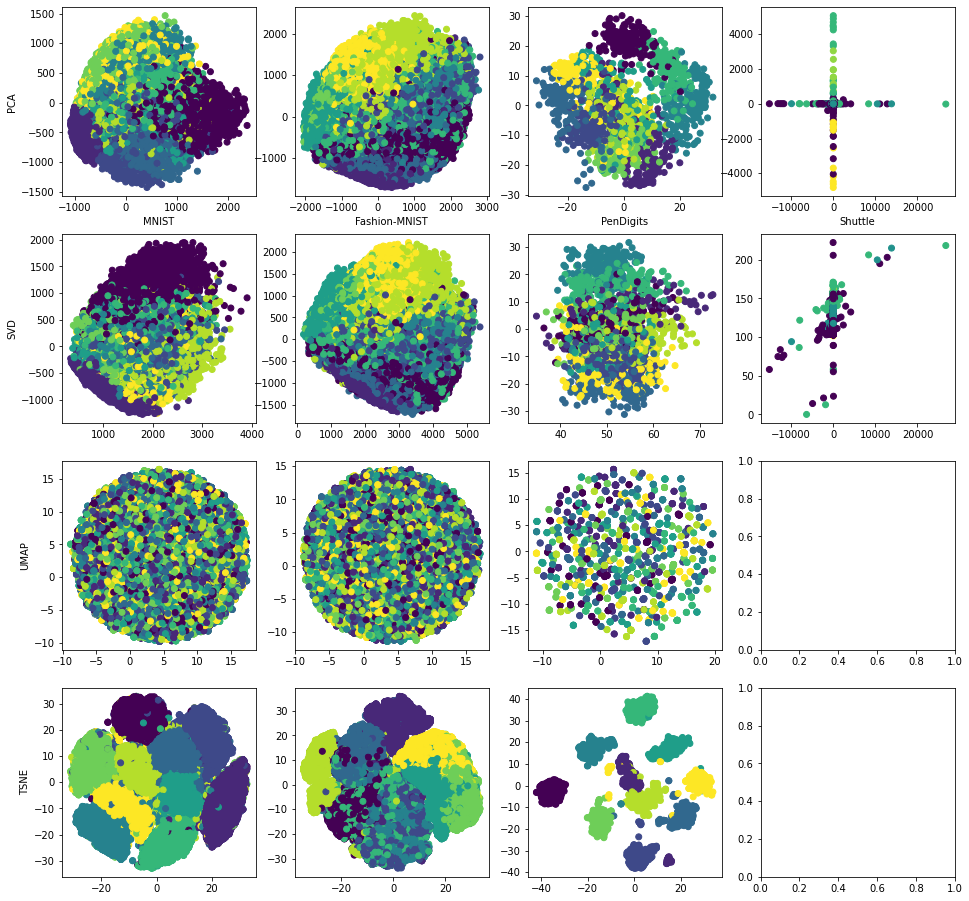

In [21]:
from IPython.display import display
display(fig)

In [ ]:
%%time 
mnist_pca = PCA(2).fit_transform(mnist)

CPU times: user 6.21 s, sys: 589 ms, total: 6.8 s
Wall time: 3.91 s


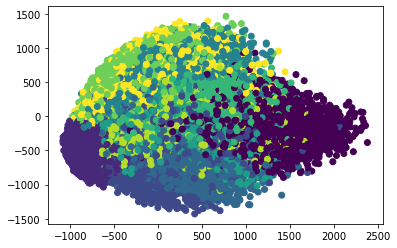

In [ ]:

plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_labels.astype(int))
plt.show()

In [22]:
%%time 
mnist_pca = TruncatedSVD(2).fit_transform(mnist)

CPU times: user 5.78 s, sys: 335 ms, total: 6.11 s
Wall time: 3.26 s


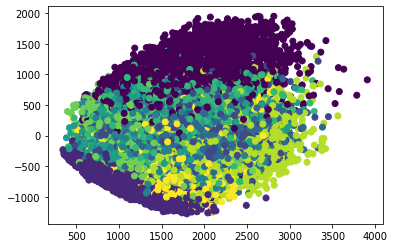

In [23]:
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_labels.astype(int))
plt.show()

In [25]:
%%time 
import warnings
warnings.filterwarnings('ignore')
mnist_pca = umap.UMAP(2).fit_transform(mnist)

CPU times: user 6min 4s, sys: 1min 8s, total: 7min 12s
Wall time: 5min 4s


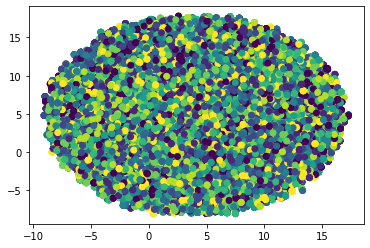

In [26]:
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_labels.astype(int))
plt.show()

In [27]:
%%time 
import warnings
warnings.filterwarnings('ignore')
mnist_pca = TSNE(2).fit_transform(mnist)

CPU times: user 45min 10s, sys: 3.69 s, total: 45min 14s
Wall time: 45min 9s


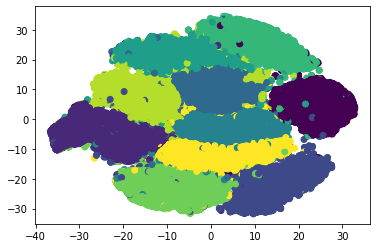

In [28]:
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_labels.astype(int))
plt.show()